In [7]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import os

#### Step 1: Load product name file

In [13]:
path = "/Users/leanhe/Desktop/Github/InstacartAnalysis/top_product_names.txt"
df = pd.read_csv(path, header = None, names = ["product_name"])
product_names = df["product_name"].tolist()

#### Step 2: Convert product names into vector embeddings

In [14]:
# Load pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings for each product name
embeddings = model.encode(product_names, show_progress_bar=True)

Batches: 100%|██████████| 142/142 [00:15<00:00,  8.92it/s]


#### Step 3: Visualize the Embeddings

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Fontconfig warning: ignoring UTF-8: not a valid region tag
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZ

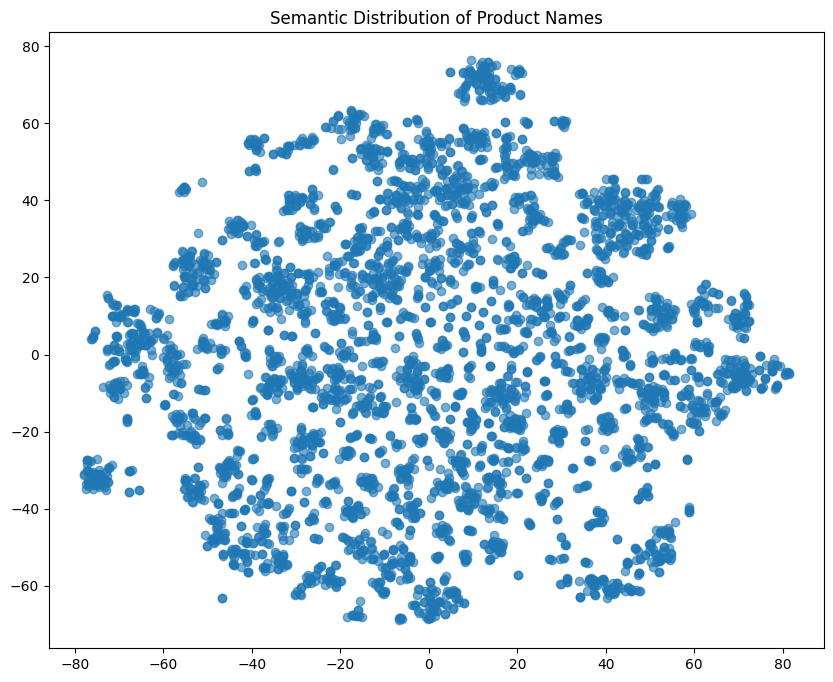

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
reduced = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.6)
plt.title("Semantic Distribution of Product Names")
plt.show()

#### Step 4: Cluster the Embeddings to Find Natural Groupings

In [18]:
from sklearn.cluster import KMeans

n_clusters = 10  # Try a few values and tune
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

for cluster_id in df['cluster'].unique():
    subset = df[df['cluster'] == cluster_id]
    vec = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
    X = vec.fit_transform(subset['product_name'])
    keywords = sorted(zip(vec.get_feature_names_out(), X.sum(axis=0).tolist()[0]), key=lambda x: -x[1])
    print(f"Cluster {cluster_id}: {[kw[0] for kw in keywords[:5]]}")

Cluster 7: ['organic', 'fruit', 'apple', 'baby', 'apples']
Cluster 1: ['organic', 'baby', 'tomato', 'green', 'red']
Cluster 6: ['sauce', 'pasta', 'original', 'salad', 'pizza']
Cluster 2: ['bread', 'chips', 'free', 'crackers', 'organic']
Cluster 4: ['cheese', 'cheddar', 'cheddar cheese', 'organic', 'shredded']
Cluster 9: ['water', 'juice', 'sparkling', 'orange', 'soda']
Cluster 5: ['milk', 'chocolate', 'organic', 'butter', 'cream']
Cluster 3: ['yogurt', 'greek', 'greek yogurt', 'organic', 'vanilla']
Cluster 0: ['chicken', 'turkey', 'organic', 'breast', 'eggs']
Cluster 8: ['paper', 'rolls', 'towels', 'paper towels', 'white']


In [29]:
# Give each cluster a readable label
cluster_labels = {
    0: "Organic Chicken & Eggs",
    1: "Organic Pantry Items",
    2: "Organic Breakfast Snacks",
    3: "Organic Yogurt",
    4: "Organic Cheese",
    5: "Organic Milk & Diary",
    6: "Frozen & Deli Items",
    7: "Organic Fresh Fruit",
    8: "Paper Towels",
    9: "Beverages & Juices"
}

df['cluster_name'] = df['cluster'].map(cluster_labels)

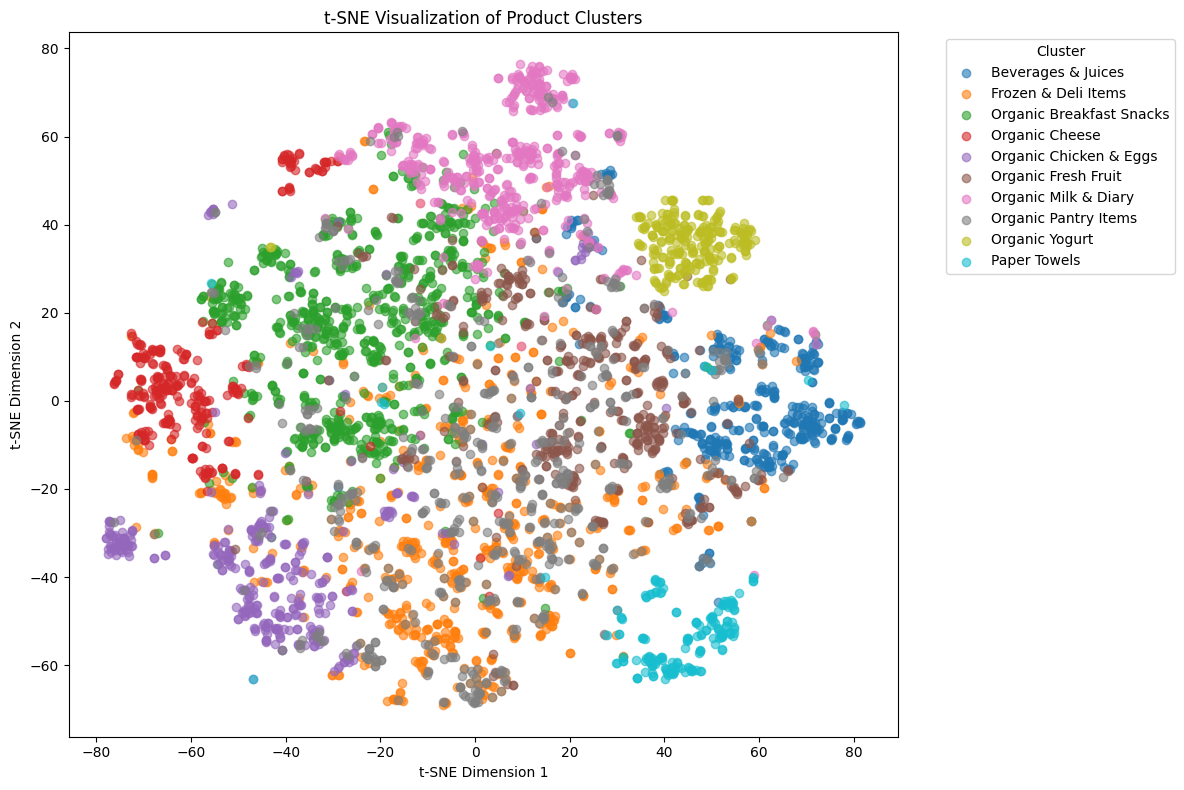

In [30]:
df[['x', 'y']] = reduced

plt.figure(figsize=(12, 8))

# Plot each cluster with a label
for name, subset in df.groupby("cluster_name"):
    plt.scatter(subset['x'], subset['y'], label=name, alpha=0.6)

plt.title("t-SNE Visualization of Product Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()